In [2]:
# importing important libraries

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
# import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, r2_score

## EDA on white wine data

In [4]:
winequality_white = pd.read_csv('winequality-white.csv', sep=';')       # load csv file
winequality_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
winequality_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
winequality_white.isnull().sum().sum()

0

In [7]:
winequality_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
winequality_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
winequality_white.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


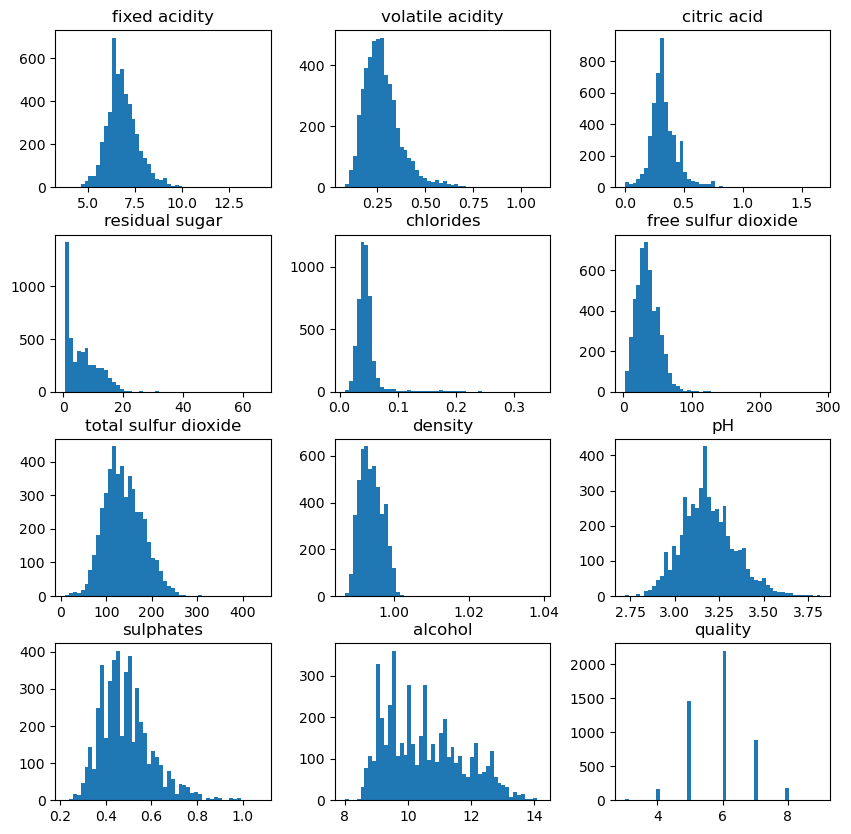

In [10]:
winequality_white.hist(figsize=(10,10),bins=50,grid=False)
plt.show()

In [11]:
winequality_white['residual sugar'].skew()

1.0770937564240868

<Axes: >

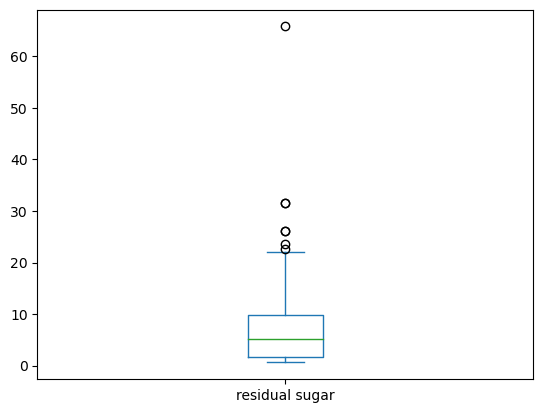

In [12]:
winequality_white['residual sugar'].plot(kind='box')

In [13]:
winequality_white[winequality_white['residual sugar']>50]    # extreme outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [14]:
winequality_white.drop(index=[2781],inplace=True)    # drop outliers

In [15]:
winequality_white['quality'].value_counts()   # check the range of diffrent wine quality

quality
6    2197
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

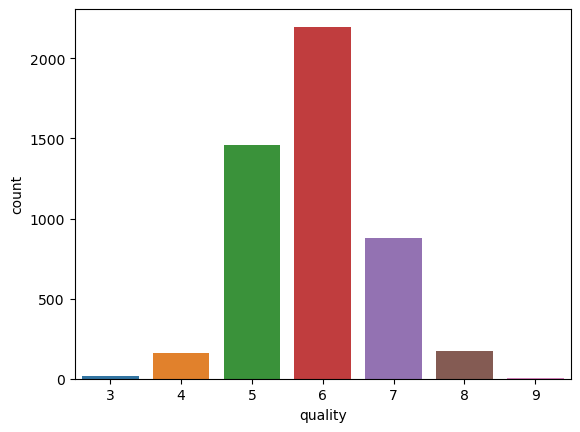

In [16]:
sns.countplot(winequality_white, x='quality', palette='tab10')    # count plot of wine quality
plt.show()

In [17]:
winequality_white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.024375,0.288858,0.087588,0.022797,-0.049048,0.090967,0.268186,-0.426296,-0.017552,-0.121129,-0.113709
volatile acidity,-0.024375,1.000000,-0.153332,0.048905,0.069053,-0.095255,0.088977,0.006376,-0.033942,-0.038363,0.066700,-0.195846
citric acid,0.288858,-0.153332,1.000000,0.090275,0.113860,0.094869,0.120965,0.146244,-0.164459,0.061594,-0.076206,-0.009276
residual sugar,0.087588,0.048905,0.090275,1.000000,0.086833,0.307356,0.405960,0.833969,-0.200190,-0.031312,-0.459462,-0.099308
chlorides,0.022797,0.069053,0.113860,0.086833,1.000000,0.101860,0.198815,0.259342,-0.090824,0.016308,-0.360539,-0.210007
free sulfur dioxide,-0.049048,-0.095255,0.094869,0.307356,0.101860,1.000000,0.615846,0.306370,-0.000180,0.059827,-0.249877,0.008205
total sulfur dioxide,0.090967,0.088977,0.120965,0.405960,0.198815,0.615846,1.000000,0.540959,0.002182,0.134426,-0.449047,-0.174757
density,0.268186,0.006376,0.146244,0.833969,0.259342,0.306370,0.540959,1.000000,-0.100046,0.070783,-0.801887,-0.314897
pH,-0.426296,-0.033942,-0.164459,-0.200190,-0.090824,-0.000180,0.002182,-0.100046,1.000000,0.155550,0.121203,0.099408
sulphates,-0.017552,-0.038363,0.061594,-0.031312,0.016308,0.059827,0.134426,0.070783,0.155550,1.000000,-0.017785,0.053645


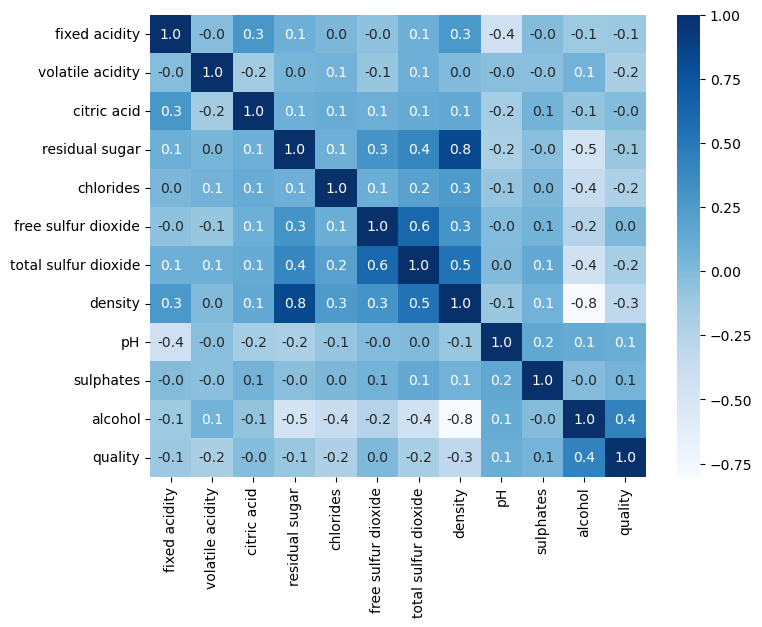

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(winequality_white.corr(),annot=True,fmt='.1f', cmap='Blues')
plt.show()

### Feature selection

In [19]:
winequality_white.shape

(4897, 12)

In [20]:
# Convert into X and y to train the model
X = winequality_white.iloc[:,0:-1]
y = winequality_white.iloc[:,-1]

In [21]:
print(X.shape)
print(y.shape)

(4897, 11)
(4897,)


In [22]:
from imblearn.over_sampling import SMOTE
ros = SMOTE(k_neighbors=4, random_state=42)
X, y = ros.fit_resample(X, y)

In [23]:
y.value_counts()

quality
6    2197
5    2197
7    2197
8    2197
4    2197
3    2197
9    2197
Name: count, dtype: int64

In [24]:
# train test split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train_temp,y_train_temp,test_size=0.2,random_state=42)

In [26]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(9842, 11)
(2461, 11)
(3076, 11)


In [27]:
# applying standard scalar

SC = StandardScaler()
xtrain_scaled = SC.fit_transform(X_train)
xval_scaled = SC.transform(X_val)
xtest_scaled = SC.transform(X_test)
xtrain_scaled = pd.DataFrame(xtrain_scaled,columns=X_train.columns)
xval_scaled = pd.DataFrame(xval_scaled,columns=X_val.columns)
xtest_scaled = pd.DataFrame(xtest_scaled,columns=X_test.columns)

## RandomForest Regressor

In [28]:
# model selection and train the model
rf_white = RandomForestClassifier(oob_score=True)
rf_white.fit(xtrain_scaled,y_train)

RandomForestClassifier(oob_score=True)

In [29]:
# prediction and accuracy
y_pred = rf_white.predict(xval_scaled)
print('Accuracy: {:0.2f}'.format(accuracy_score(y_val,y_pred)))
print('f1 score: {:0.2f}'.format(f1_score(y_val,y_pred, average='weighted')))

Accuracy: 0.87
f1 score: 0.87


In [30]:
rf_white.oob_score_

0.8685226579963422

### Hyperparameter tuning

In [31]:
rf_white_tuned = RandomForestClassifier(n_estimators=1000,oob_score=True)
rf_white_tuned.fit(xtrain_scaled,y_train)

RandomForestClassifier(n_estimators=1000, oob_score=True)

In [32]:
y_pred = rf_white_tuned.predict(xval_scaled)
print('Accuracy: {:0.2f}'.format(accuracy_score(y_val,y_pred)))
print('f1 score: {:0.2f}'.format(f1_score(y_val,y_pred, average='weighted')))

Accuracy: 0.88
f1 score: 0.88


In [33]:
rf_white_tuned.oob_score_

0.8769559032716927

In [34]:
# EVALUATION WITH TEST DATA

y_pred = rf_white_tuned.predict(xtest_scaled)
print('Accuracy: {:0.2f}'.format(accuracy_score(y_test,y_pred)))
print('f1 score: {:0.2f}'.format(f1_score(y_test,y_pred, average='weighted')))

Accuracy: 0.88
f1 score: 0.88


In [35]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[434   1   0   0   0   0   0]
 [  0 426   5   1   0   0   0]
 [  1  31 358  63   8   3   0]
 [  2  13  67 265  89  10   0]
 [  3   1   5  27 375  17   1]
 [  0   2   0   1  12 433   0]
 [  0   0   0   0   0   0 422]]


# Export model for web-app

In [36]:
import pickle
pickle.dump(winequality_white,open('white_wine.pkl','wb'))
pickle.dump(rf_white_tuned,open('final_model.pkl','wb'))
pickle.dump(SC,open('preprocessing.pkl','wb'))